## PHASE 4
### RNNs and Attention Mechanisms

## **Data Preparation**

In this section, we will download the IMDb movie reviews dataset, extract its contents, and explore the structure of the data to understand how the files are organized.


In [ ]:
!wget -q --show-progress https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

!tar -xzf aclImdb_v1.tar.gz


aclImdb_v1.tar.gz.1 100%[===================>]  80.23M  6.16MB/s    in 15s     


In [ ]:
# Directory structure
!ls -R aclImdb | head -n 30



aclImdb:
imdbEr.txt
imdb.vocab
README
test
train

aclImdb/test:
labeledBow.feat
neg
pos
urls_neg.txt
urls_pos.txt

aclImdb/test/neg:
0_2.txt
10000_4.txt
10001_1.txt
10002_3.txt
10003_3.txt
1000_3.txt
10004_2.txt
10005_2.txt
10006_2.txt
10007_4.txt
10008_4.txt
10009_3.txt
10010_2.txt
10011_1.txt
10012_1.txt


In [ ]:
!echo "Contents of 'train' directory:"
!ls -R aclImdb/train | head -n 20

!echo "Contents of 'train/neg' directory:"
!ls aclImdb/train/neg | head -n 10

!echo "Contents of 'train/pos' directory:"
!ls aclImdb/train/pos | head -n 10

!echo "Contents of 'train/unsup' directory:"
!ls aclImdb/train/unsup | head -n 10


Contents of 'train' directory:
aclImdb/train:
labeledBow.feat
neg
pos
unsup
unsupBow.feat
urls_neg.txt
urls_pos.txt
urls_unsup.txt

aclImdb/train/neg:
0_3.txt
10000_4.txt
10001_4.txt
10002_1.txt
10003_1.txt
10004_3.txt
1000_4.txt
10005_3.txt
10006_4.txt
Contents of 'train/neg' directory:
0_3.txt
10000_4.txt
10001_4.txt
10002_1.txt
10003_1.txt
10004_3.txt
1000_4.txt
10005_3.txt
10006_4.txt
10007_1.txt
Contents of 'train/pos' directory:
0_9.txt
10000_8.txt
10001_10.txt
10002_7.txt
10003_8.txt
10004_8.txt
10005_7.txt
10006_7.txt
10007_7.txt
10008_7.txt
Contents of 'train/unsup' directory:
0_0.txt
10000_0.txt
1000_0.txt
10001_0.txt
10002_0.txt
10003_0.txt
10004_0.txt
10005_0.txt
10006_0.txt
10007_0.txt


# **Data Exploration and Loading**

*In this section, we will read and display the content of some files to understand the data better. We will also load the reviews into a DataFrame along with their corresponding sentiments.*

## **Reading and Displaying File Contents**

*We define a function to read and display the top 10 lines of the first `.txt` file in each directory with text wrapping to make it more readable.*

In [ ]:
import os
import textwrap

# Function to read and display the top 10 lines of the first .txt file with wrapping
def display_first_file_with_wrapping(directory):
    files = sorted(os.listdir(directory))
    with open(os.path.join(directory, files[0]), 'r', encoding='utf-8') as file:
        print(f"Top 10 lines of {files[0]} from {directory} directory:\n")
        for i, line in enumerate(file):
            if i < 10:
                wrapped_line = textwrap.fill(line.strip(), width=80)
                print(wrapped_line)
            else:
                break
        print("\n")

# Display the first file in the train/neg directory
display_first_file_with_wrapping('aclImdb/train/neg')

# Display the first file in the train/pos directory
display_first_file_with_wrapping('aclImdb/train/pos')

# Display the first file in the train/unsup directory
display_first_file_with_wrapping('aclImdb/train/unsup')


Top 10 lines of 0_3.txt from aclImdb/train/neg directory:

Story of a man who has unnatural feelings for a pig. Starts out with a opening
scene that is a terrific example of absurd comedy. A formal orchestra audience
is turned into an insane, violent mob by the crazy chantings of it's singers.
Unfortunately it stays absurd the WHOLE time with no general narrative
eventually making it just too off putting. Even those from the era should be
turned off. The cryptic dialogue would make Shakespeare seem easy to a third
grader. On a technical level it's better than you might think with some good
cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and
Frederic Forrest can be seen briefly.


Top 10 lines of 0_9.txt from aclImdb/train/pos directory:

Bromwell High is a cartoon comedy. It ran at the same time as some other
programs about school life, such as "Teachers". My 35 years in the teaching
profession lead me to believe that Bromwell High's satire is much closer to

In [ ]:
import pandas as pd


# Empty lists to hold the reviews and sentiments
reviews = []
sentiments = []

# Positive reviews in Dataframe and labelling them as 1-
positive_directory = 'aclImdb/train/pos'
for review_file in os.listdir(positive_directory):
    with open(os.path.join(positive_directory, review_file), 'r', encoding='utf-8') as file:
        reviews.append(file.read())
        sentiments.append(1)

# Negative reviews in Dataframe and labelling them as 0-
negative_directory = 'aclImdb/train/neg'
for review_file in os.listdir(negative_directory):
    with open(os.path.join(negative_directory, review_file), 'r', encoding='utf-8') as file:
        reviews.append(file.read())
        sentiments.append(0)

# Unsupervised reviews in Dataframe and labelling them as None-
unsupervised_directory = 'aclImdb/train/unsup'
for review_file in os.listdir(unsupervised_directory):
    with open(os.path.join(unsupervised_directory, review_file), 'r', encoding='utf-8') as file:
        reviews.append(file.read())
        sentiments.append(None)




In [ ]:
train_data = pd.DataFrame({'review': reviews, 'sentiment': sentiments})
train_data['sentiment'] = train_data['sentiment'].astype('Int64')

In [ ]:
train_data.head()

,review,sentiment
0,Critics need to review what they class as a qu...,1
1,I remember seeing this years ago when it first...,1
2,"Lapyuta (Castle in the Sky), more than any of ...",1
3,"Dear Readers,<br /><br />The final battle betw...",1
4,"Let me be up-front, I like pulp. However it is...",1


In [ ]:
unique_sentiments = train_data['sentiment'].unique()
unique_sentiments

<IntegerArray>
[1, 0, <NA>]
Length: 3, dtype: Int64

# **Text Preprocessing**

*In this section, we will preprocess the text data to clean and normalize it for further analysis. This involves steps such as removing HTML tags, URLs, special characters, punctuation, numbers, and stop words, as well as performing tokenization, stemming, and lemmatization.*

## **Preprocessing Steps**

*We will use the NLTK library for various preprocessing tasks. Let's start by importing the necessary libraries and downloading the required resources.*

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize NLTK tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Preprocessing texts
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Removing HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Removing URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Removing special characters and punctuation
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    # Removing numbers
    text = re.sub(r'\d+', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Removing stop words
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming and Lemmatization

    # tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Removing non-alphabetic tokens
    tokens = [word for word in tokens if word.isalpha()]

    # Removing extra whitespace
    text = ' '.join(tokens)

    return text

# Apply preprocessing to the dataframe
train_data['processed_text'] = train_data['review'].apply(preprocess_text)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
train_data.head()

,review,sentiment,processed_text
0,Critics need to review what they class as a qu...,1,critic need review class quality movie think c...
1,I remember seeing this years ago when it first...,1,remember seeing year ago first came floored pa...
2,"Lapyuta (Castle in the Sky), more than any of ...",1,lapyuta castle sky hayao miyazakis movie bring...
3,"Dear Readers,<br /><br />The final battle betw...",1,dear readersthe final battle rebellion empire ...
4,"Let me be up-front, I like pulp. However it is...",1,let upfront like pulp however like one easier ...


In [ ]:
import gensim.downloader as api

# Load a smaller GloVe model
word_vectors = api.load('glove-wiki-gigaword-100')



In [ ]:
import numpy as np

def document_embedding(text):
    # Tokenize the text
    tokens = text.split()

    # Get the embeddings for each token if it's in the GloVe vocabulary
    embeddings = [word_vectors[word] for word in tokens if word in word_vectors.key_to_index]

    # If there are no embeddings (i.e., none of the words were in the vocabulary), return a zero vector
    if not embeddings:
        return np.zeros(word_vectors.vector_size)

    # Otherwise, return the mean of the embeddings
    return np.mean(embeddings, axis=0)

# Apply the document_embedding function to each processed text
train_data['embedding'] = train_data['processed_text'].apply(document_embedding)


In [ ]:
train_data.head()

,review,sentiment,processed_text,embedding
0,Critics need to review what they class as a qu...,1,critic need review class quality movie think c...,"[-0.08096643, 0.1764986, 0.2544236, -0.1136304..."
1,I remember seeing this years ago when it first...,1,remember seeing year ago first came floored pa...,"[-0.005645914, 0.17733665, 0.27142677, -0.3126..."
2,"Lapyuta (Castle in the Sky), more than any of ...",1,lapyuta castle sky hayao miyazakis movie bring...,"[0.00430732, 0.13938707, 0.40279338, -0.191856..."
3,"Dear Readers,<br /><br />The final battle betw...",1,dear readersthe final battle rebellion empire ...,"[-0.026942084, 0.022263667, 0.2215667, -0.1388..."
4,"Let me be up-front, I like pulp. However it is...",1,let upfront like pulp however like one easier ...,"[-0.03924642, 0.20587397, 0.28734, -0.14492807..."


### Simple RNN Implementation from sratch

This Python code defines a simple recurrent neural network (RNN) class using NumPy for sequence processing tasks. The class features include:

- **Initialization**: Sets up weight matrices and biases for the input-to-hidden, hidden-to-hidden, and hidden-to-output connections, all initialized with small random values to break symmetry.
- **Forward Pass**: Computes the hidden states and outputs sequentially for each timestep using the hyperbolic tangent (tanh) as the activation function for hidden states and the sigmoid function for output.
- **Backward Pass (Backpropagation Through Time - BPTT)**: Calculates gradients for model parameters with respect to the loss function, implements gradient clipping to avoid exploding gradients, and updates the weights using a small learning rate.
- **State Management**: Includes methods to reset hidden states and track intermediate states for possible debugging or visualization.

This RNN class is designed to handle basic sequence prediction tasks where inputs are provided as sequences, and it directly predicts an output for each input sequence.


In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(output):
    return output * (1 - output)

def tanh_derivative(output):
    return 1 - np.power(output, 2)

class SimpleRNN:
    def __init__(self, input_size, hidden_size, output_size):
        self.Wxh = np.random.randn(hidden_size, input_size) * 0.01
        self.Whh = np.random.randn(hidden_size, hidden_size) * 0.01
        self.Why = np.random.randn(output_size, hidden_size) * 0.01
        self.bh = np.zeros((hidden_size, 1))
        self.by = np.zeros((output_size, 1))
        # Initialize the container for tracking states
        self.intermediate_states = []

    def reset_states(self):
        self.hidden_states = {-1: np.zeros((self.bh.shape[0], 1))}
    def forward(self, inputs):
        self.inputs = np.array(inputs, dtype=np.float32)
        self.hidden_states = {-1: np.zeros((self.bh.shape[0], 1), dtype=np.float32)}
        self.outputs = {}
        self.intermediate_states.clear()  # Clear previous states

        for t in range(len(inputs)):
            x = self.inputs[t].reshape(-1, 1)
            self.hidden_states[t] = np.tanh(
                np.dot(self.Wxh, x) + np.dot(self.Whh, self.hidden_states[t-1]) + self.bh
            )
            output = sigmoid(
                np.dot(self.Why, self.hidden_states[t]) + self.by
            )
            self.outputs[t] = output
            # Store intermediate states for visualization
            self.intermediate_states.append((self.hidden_states[t], output))

        return self.outputs[len(inputs)-1], self.hidden_states[len(inputs)-1]

    def backward(self, targets):
        dWxh, dWhh, dWhy = np.zeros_like(self.Wxh), np.zeros_like(self.Whh), np.zeros_like(self.Why)
        dbh, dby = np.zeros_like(self.bh), np.zeros_like(self.by)
        dnext_h = np.zeros_like(self.hidden_states[0])

        targets = np.array(targets, dtype=np.float32).reshape(-1, 1)

        for t in reversed(range(len(self.inputs))):
            dy = self.outputs[t] - targets[t]
            dWhy += np.dot(dy, self.hidden_states[t].T)
            dby += dy
            dh = np.dot(self.Why.T, dy) + dnext_h
            dh_raw = tanh_derivative(self.hidden_states[t]) * dh
            dbh += dh_raw
            dWxh += np.dot(dh_raw, self.inputs[t].reshape(1, -1))
            if t != 0:
                dWhh += np.dot(dh_raw, self.hidden_states[t-1].T)
            dnext_h = np.dot(self.Whh.T, dh_raw)

        # Apply gradient clipping and update weights and biases
        for dparam in [dWxh, dWhh, dWhy, dbh, dby]:
            np.clip(dparam, -5, 5, out=dparam)

        # Update weights with a learning rate
        self.Wxh -= 0.001 * dWxh
        self.Whh -= 0.001 * dWhh
        self.Why -= 0.001 * dWhy
        self.bh -= 0.001 * dbh
        self.by -= 0.001 * dby
rnn_model = SimpleRNN(input_size=100, hidden_size=50, output_size=1)


### Data Preparation for Sentiment Analysis

This section of the code handles the preparation of training data for sentiment analysis from a DataFrame containing movie reviews. Key steps include:

- **Data Cleaning**: Filters out entries with missing sentiment values to ensure the model is trained only on data with known outcomes.
- **Text Preprocessing**: Applies a preprocessing function to the reviews to convert raw text into a more analyzable format. This typically includes tasks like lowercasing, removing punctuation, and tokenization.
- **Embedding Generation**: Transforms the preprocessed texts into numerical embeddings. Each review is represented as a vector, which captures semantic information necessary for model training.
- **Data Splitting**: Divides the processed data into training and validation sets using a 80/20 split to evaluate model performance on unseen data.

The outputs include shapes of the training and validation datasets, ensuring that data is correctly organized and ready for modeling.


In [ ]:
import pandas as pd
import numpy as np


# Filtering out entries where sentiment is None
supervised_data = train_data[train_data['sentiment'].notna()]

# Apply preprocessing to the DataFrame to get processed texts
supervised_data['processed_text'] = supervised_data['review'].apply(preprocess_text)

# Create embeddings for each processed text
supervised_data['embedding'] = supervised_data['processed_text'].apply(document_embedding)

# Prepare inputs and labels
X = np.stack(supervised_data['embedding'].values)
y = supervised_data['sentiment'].values
y = y.reshape(-1, 1)

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)


<ipython-input-48-376ef817c7fc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supervised_data['processed_text'] = supervised_data['review'].apply(preprocess_text)


Training set shape: (20000, 100) (20000, 1)
Validation set shape: (5000, 100) (5000, 1)


<ipython-input-48-376ef817c7fc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supervised_data['embedding'] = supervised_data['processed_text'].apply(document_embedding)


In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")


X_train shape: (20000, 100)
y_train shape: (20000, 1)
X_val shape: (5000, 100)
y_val shape: (5000, 1)


### Training the RNN Model

This segment of the code focuses on training the simple recurrent neural network (RNN) defined earlier. The training process involves:

- **Epoch Loop**: Iterates through the specified number of epochs to train the model multiple times over the data, allowing the model to refine its weights.
- **Batch Processing**: Although not batch processing in a traditional sense, each data point is processed individually, simulating a batch size of one. This includes reshaping the input to fit the expected model input format.
- **Forward Pass**: Executes the forward propagation of the RNN to get predictions based on current weights.
- **Loss Calculation**: Computes the binary cross-entropy loss to quantify the difference between the predicted values and actual targets, which guides the weight updates.
- **Backward Pass**: Conducts backpropagation to update the model's weights based on the gradient of the loss function, aiming to minimize loss.
- **Loss Reporting**: Prints the average loss per epoch to monitor the training process and convergence behavior.

The function `train_rnn` encapsulates this process, taking the RNN model, training data (features and labels), number of epochs, and learning rate as inputs. This function is then used to train the model with training data, providing feedback on performance after each epoch.


In [ ]:
def train_rnn(model, X_train, y_train, epochs=10, learning_rate=1e-3):
    for epoch in range(epochs):
        total_loss = 0
        for i in range(len(X_train)):
            # Reshape each sample to (1, input_size) to simulate a "sequence" of one timestep
            input_seq = X_train[i].reshape(1, -1)
            target = np.array([y_train[i]])

            # Forward pass: get the model's prediction
            output, hidden_state = model.forward(input_seq)

            # Compute binary cross-entropy loss
            loss = -(target * np.log(output) + (1 - target) * np.log(1 - output))
            total_loss += loss.item()

            # Backward pass: update model weights
            model.backward(target)

        average_loss = total_loss / len(X_train)
        print(f"Epoch {epoch + 1}/{epochs}: Loss = {average_loss}")

# Create an instance of the RNN
rnn_model = SimpleRNN(input_size=100, hidden_size=50, output_size=1)

# Train the RNN model
train_rnn(rnn_model, X_train, y_train, epochs=5)


Epoch 1/5: Loss = 0.6930044080766162
Epoch 2/5: Loss = 0.6909405862569041
Epoch 3/5: Loss = 0.6767577528652979
Epoch 4/5: Loss = 0.6237495295178329
Epoch 5/5: Loss = 0.5610192233826291


In [ ]:
def evaluate_rnn(model, X_val, y_val):
    correct_predictions = 0  # Initialize as integer
    total = len(X_val)  # Total should correctly be an integer

    y_val = np.array(y_val).flatten()  # Flatten y_val to ensure it's a 1-D array

    for i in range(total):
        input_seq = X_val[i].reshape(1, -1)
        output, _ = model.forward(input_seq)
        # Flatten output and convert to binary predictions
        predicted = (output > 0.5).astype(int).flatten()
        # Summing up the correctly predicted instances
        correct_predictions += (predicted == y_val[i]).astype(int).sum()

    accuracy = correct_predictions / total  # Converted to scalar
    print(f"Validation Accuracy: {accuracy:.4f}")

# Call the function to evaluate the RNN
evaluate_rnn(rnn_model, X_val, y_val)


Validation Accuracy: 0.7502


### Visualization of Sentiment Evolution in Text Reviews

The `visualize_sentiment_evolution` function demonstrates how sentiment develops throughout individual reviews by plotting the progression of sentiment probabilities for each word in a review. Here’s what happens step-by-step:

- **Text Processing**: Each review is preprocessed and tokenized into individual words.
- **Embedding Generation**: Each token is converted into an embedding vector if it exists in the predefined word vectors.
- **Sentiment Calculation**: The model evaluates the sentiment after processing each word, capturing how the perceived sentiment evolves as more of the review is read.
- **Plotting**: A line plot is created for each review, showing the sentiment probability against the word index. Each point on the plot represents the sentiment probability after a particular word.
- **Result Display**:
  - **Graph**: Displays how sentiment probability changes from the beginning to the end of the review.
  - **Predicted Sentiment**: Shows whether the overall sentiment of the review is predicted as 'Positive' or 'Negative' based on the last word's sentiment probability.
  - **Actual Sentiment**: Provides the actual sentiment label for the review for comparison.
  - **Tokens and Indices**: Each word from the review is listed below the graph with corresponding indices to help identify which words influence sentiment changes.

This visualization helps in understanding how individual words contribute to the overall sentiment of a text and can be particularly useful for debugging and improving sentiment analysis models.


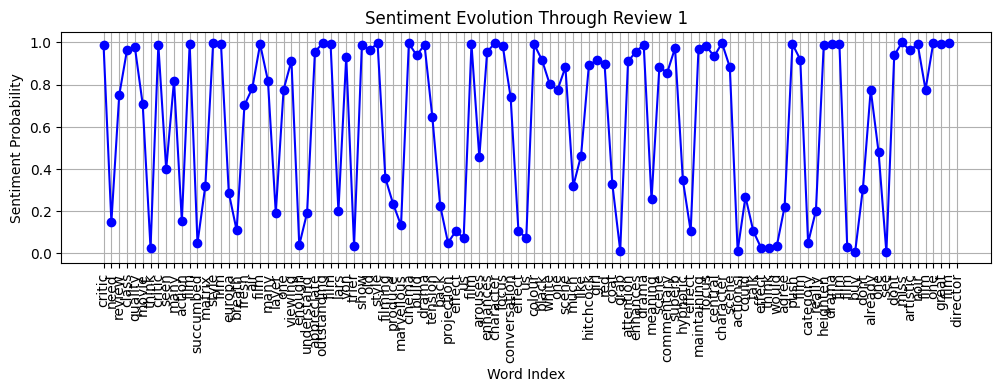

Review 1 Tokens: ['critic', 'need', 'review', 'class', 'quality', 'movie', 'think', 'critic', 'seen', 'many', 'action', 'film', 'succumbed', 'matrix', 'style', 'film', 'europa', 'breath', 'fresh', 'air', 'film', 'many', 'layer', 'one', 'viewing', 'enough', 'understand', 'appreciate', 'outstanding', 'film', 'lars', 'von', 'trier', 'show', 'old', 'style', 'filming', 'produce', 'marvellous', 'cinema', 'build', 'drama', 'tension', 'back', 'projection', 'effect', 'us', 'film', 'arouses', 'enhances', 'character', 'focus', 'conversation', 'effect', 'us', 'colour', 'black', 'white', 'one', 'scene', 'much', 'like', 'hitchcock', 'girl', 'red', 'coat', 'grab', 'attention', 'enhances', 'drama', 'meaning', 'scene', 'commentary', 'superb', 'hypnotic', 'effect', 'maintaining', 'focus', 'central', 'character', 'scene', 'actionsi', 'could', 'talk', 'effect', 'think', 'would', 'agree', 'push', 'film', 'category', 'really', 'heighten', 'drama', 'film', 'film', 'buy', 'dont', 'already', 'one', 'see', 'don

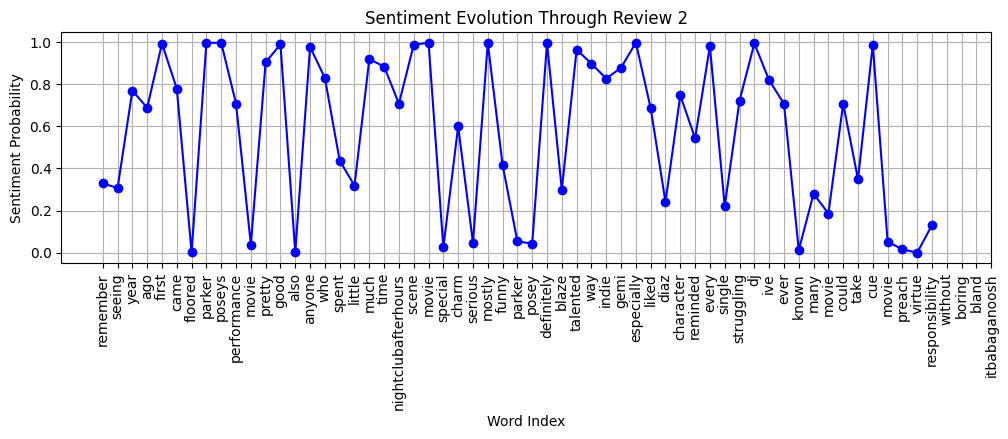

Review 2 Tokens: ['remember', 'seeing', 'year', 'ago', 'first', 'came', 'floored', 'parker', 'poseys', 'performance', 'movie', 'pretty', 'good', 'also', 'anyone', 'who', 'spent', 'little', 'much', 'time', 'nightclubafterhours', 'scene', 'movie', 'special', 'charm', 'serious', 'mostly', 'funny', 'parker', 'posey', 'definitely', 'blaze', 'talented', 'way', 'indie', 'gemi', 'especially', 'liked', 'diaz', 'character', 'reminded', 'every', 'single', 'struggling', 'dj', 'ive', 'ever', 'known', 'many', 'movie', 'could', 'take', 'cue', 'movie', 'preach', 'virtue', 'responsibility', 'without', 'boring', 'bland', 'itbabaganoosh']
Review 2 Final Predicted Sentiment: Negative
Review 2 Actual Sentiment: Positive


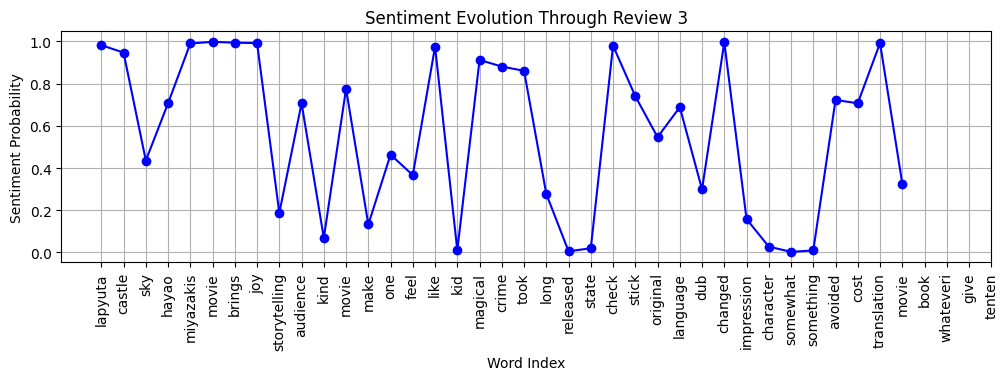

Review 3 Tokens: ['lapyuta', 'castle', 'sky', 'hayao', 'miyazakis', 'movie', 'brings', 'joy', 'storytelling', 'audience', 'kind', 'movie', 'make', 'one', 'feel', 'like', 'kid', 'magical', 'crime', 'took', 'long', 'released', 'state', 'check', 'stick', 'original', 'language', 'dub', 'changed', 'impression', 'character', 'somewhat', 'something', 'avoided', 'cost', 'translation', 'movie', 'book', 'whateveri', 'give', 'tenten']
Review 3 Final Predicted Sentiment: Negative
Review 3 Actual Sentiment: Positive


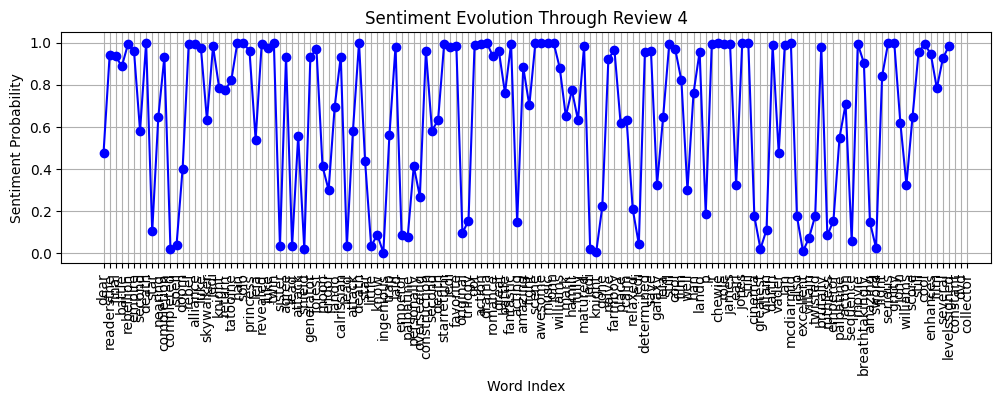

Review 4 Tokens: ['dear', 'readersthe', 'final', 'battle', 'rebellion', 'empire', 'second', 'death', 'star', 'nearing', 'completion', 'completed', 'spell', 'doom', 'rebel', 'alliance', 'luke', 'skywalker', 'jedi', 'knight', 'return', 'tatooine', 'han', 'solo', 'princess', 'leia', 'revealed', 'luke', 'twin', 'sister', 'agree', 'lead', 'attack', 'shield', 'generator', 'forest', 'moon', 'endor', 'lando', 'calrissian', 'lead', 'attack', 'death', 'star', 'little', 'know', 'ingenious', 'trap', 'laid', 'emperor', 'palpatine', 'personally', 'overseeing', 'construction', 'second', 'death', 'starreturn', 'jedi', 'favorite', 'original', 'trilogy', 'got', 'action', 'drama', 'romance', 'great', 'battle', 'fantastic', 'acting', 'amazing', 'fight', 'scene', 'awesome', 'music', 'john', 'williams', 'mark', 'hamill', 'fully', 'matured', 'jedi', 'knight', 'gone', 'naive', 'farmboy', 'place', 'calm', 'relaxed', 'jedi', 'determined', 'save', 'galaxy', 'leia', 'still', 'cool', 'film', 'well', 'han', 'lando'

In [ ]:
def visualize_sentiment_evolution(model, reviews_texts, actual_sentiments):
    import matplotlib.pyplot as plt

    # Process each review
    for index, (review_text, actual_sentiment) in enumerate(zip(reviews_texts, actual_sentiments)):
        tokens = preprocess_text(review_text).split()
        embeddings = [document_embedding(token) for token in tokens if token in word_vectors.key_to_index]

        # Reset the RNN states for each review
        model.reset_states()

        # Collect sentiment probabilities after each word
        outputs = []
        for embedding in embeddings:
            output, _ = model.forward([embedding])  # Forward pass for each embedding
            outputs.append(output.flatten()[0])  # Store the sentiment probability

        # Plot the evolution of sentiment probabilities
        plt.figure(figsize=(12, 3))
        plt.plot(outputs, marker='o', linestyle='-', color='b')
        plt.title(f'Sentiment Evolution Through Review {index+1}')
        plt.xlabel('Word Index')
        plt.ylabel('Sentiment Probability')
        plt.xticks(ticks=range(len(tokens)), labels=tokens, rotation=90)
        plt.grid(True)
        plt.show()

        # Output the prediction results
        final_prediction = 'Positive' if outputs[-1] > 0.5 else 'Negative'
        actual_label = 'Positive' if actual_sentiment == 1 else 'Negative'
        print(f"Review {index+1} Tokens:", tokens)
        print(f"Review {index+1} Final Predicted Sentiment:", final_prediction)
        print(f"Review {index+1} Actual Sentiment:", actual_label)


num_reviews = 4
selected_review_texts = train_data['review'].iloc[:num_reviews]
actual_sentiments = train_data['sentiment'].iloc[:num_reviews]
visualize_sentiment_evolution(rnn_model, selected_review_texts, actual_sentiments)


In [ ]:
y_train = y_train.astype('float32')
y_val = y_val.astype('float32')


### Bidirectional LSTM
This code constructs and trains a bidirectional LSTM model using TensorFlow and Keras for sentiment analysis on the IMDb movie reviews dataset. Below is an overview of the process:

- **Data Loading and Preprocessing**: The dataset is loaded with a limited vocabulary and reviews are padded to a uniform length for consistent processing.

### Model Architecture

- **Input Layer**: Specifies the input shape for the processed reviews.
- **Embedding Layer**: Converts word indices to dense vectors.
- **Bidirectional LSTM Layer**: Processes text sequences from both directions to better capture contextual relationships within the text.
- **Output Layer**: Uses a sigmoid function to classify the review sentiment as positive or negative.

- **Compilation and Training**:
  - The model is compiled with the Adam optimizer and binary cross-entropy loss, focusing on accuracy.
  - It is trained over multiple epochs with performance validated against a test set.

### Why Use LSTM?

LSTMs help overcome the vanishing gradient problem common in traditional RNNs by using a gating mechanism that manages the flow of information. This allows the model to learn from data points situated far apart in the input sequence, making LSTMs ideal for tasks like sentiment analysis where understanding the broader context is crucial.

### Training Process and Output

The model's structure is confirmed through a summary display before training begins. The model is then trained on the dataset, with progress monitored through loss and accuracy metrics evaluated on the test data to ensure effective generalization.

This setup provides insights into model performance and helps in tuning for better accuracy on unseen data.


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Bidirectional, Flatten
import tensorflow as tf

max_features = 10000  # Number of words in the vocabulary
maxlen = 100  # Maximum sequence length
embedding_dim = 128  # Dimensionality of the embedding space

# Load the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=max_features)
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

# Define the model
input_layer = Input(shape=(maxlen,))
embedding_layer = Embedding(max_features, embedding_dim, input_length=maxlen)(input_layer)
lstm_layer = Bidirectional(LSTM(128, return_sequences=False))(embedding_layer)
output_layer = Dense(1, activation='sigmoid')(lstm_layer)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history_lstm = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_2 (Embedding)              │ (None, 100, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 256)                 │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,543,425 (5.89 MB)

 Trainable params: 1,543,425 (5.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 295s 742ms/step - accuracy: 0.6982 - loss: 0.5390 - val_accuracy: 0.8384 - val_loss: 0.3792
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 300s 685ms/step - accuracy: 0.8955 - loss: 0.2615 - val_accuracy: 0.8493 - val_loss: 0.3766
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 276s 705ms/step - accuracy: 0.9337 - loss: 0.1739 - val_accuracy: 0.8438 - val_loss: 0.4310
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 313s 682ms/step - accuracy: 0.9608 - loss: 0.1109 - val_accuracy: 0.8400 - val_loss: 0.4388
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 272s 696ms/step - accuracy: 0.9802 - loss: 0.0644 - val_accuracy: 0.8396 - val_loss: 0.5558


### GRU Model

This code snippet sets up a Gated Recurrent Unit (GRU) model using TensorFlow and Keras for sentiment analysis on the IMDb movie reviews dataset. The process and components of the model are outlined as follows:

- **Data Loading and Preprocessing**: The IMDb dataset is loaded with a predefined number of the most frequent words. The reviews are then padded to ensure they all have the same length for model processing.

### Model Architecture

- **Input Layer**: Defines the input shape to match the length of processed reviews.
- **Embedding Layer**: Maps the integer-encoded vocabulary to dense vector representations.
- **GRU Layer**: An advanced RNN layer that processes text sequences. Unlike standard RNNs, GRUs use gating mechanisms to control the flow of information, which helps in overcoming the vanishing gradient problem by retaining long-term dependencies more effectively.
- **Output Layer**: A dense layer with a sigmoid activation function, designed to classify the sentiment of the review as either positive or negative.

- **Compilation and Training**:
  - The model is compiled with the Adam optimizer and binary cross-entropy loss, targeting accuracy as the key metric.
  - It undergoes training for several epochs, with performance metrics evaluated against a separate test dataset.

### Why Use GRU?

GRUs simplify the gating mechanism found in LSTMs while maintaining similar performance, making them computationally more efficient and easier to run, especially on smaller datasets. They address the key limitation of traditional RNNs—difficulty in learning long-range dependencies—by using update and reset gates that decide what information should be passed to the output, making them suitable for tasks where context spans over long sequences.

### Training Process and Output

The training process begins with a summary of the model to confirm its structure. The model is then trained using the training data, with each epoch displaying the loss and accuracy, helping to monitor the model’s improvement and effectiveness over time. Validation data is used simultaneously to ensure the model does not overfit and performs well on unseen data.

This structured approach not only trains the model effectively but also provides critical insights into its performance, facilitating further optimizations if necessary.


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, GRU, Dense, Dropout
import tensorflow as tf

# Parameters
max_features = 10000
maxlen = 100
embedding_dim = 128

# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=max_features)
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

# Define the model
input_layer = Input(shape=(maxlen,))
embedding_layer = Embedding(max_features, embedding_dim, input_length=maxlen)(input_layer)
gru_layer = GRU(64, return_sequences=False)(embedding_layer)
output_layer = Dense(1, activation='sigmoid')(gru_layer)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history_gru = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_3 (Embedding)              │ (None, 100, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 64)                  │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,317,313 (5.03 MB)

 Trainable params: 1,317,313 (5.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 85s 208ms/step - accuracy: 0.7033 - loss: 0.5353 - val_accuracy: 0.8402 - val_loss: 0.3690
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 86s 219ms/step - accuracy: 0.8940 - loss: 0.2634 - val_accuracy: 0.8514 - val_loss: 0.3470
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 144s 225ms/step - accuracy: 0.9309 - loss: 0.1842 - val_accuracy: 0.8485 - val_loss: 0.3989
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 137s 212ms/step - accuracy: 0.9600 - loss: 0.1155 - val_accuracy: 0.8397 - val_loss: 0.4316
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 212ms/step - accuracy: 0.9759 - loss: 0.0750 - val_accuracy: 0.8365 - val_loss: 0.5264


### Comparing LSTM and GRU Model Performance

This code visualizes the training and validation performance of two different types of recurrent neural networks: LSTM and GRU. The function `plot_training_history` generates two plots:

- **Accuracy Plot**: This graph displays the accuracy of both models over multiple training epochs. It shows how well each model is performing in terms of correctly classifying the sentiment of movie reviews. The plot includes lines for both training accuracy (solid lines) and validation accuracy (dashed lines), allowing you to compare how the models perform on both the training data and unseen test data.

- **Loss Plot**: This graph shows the loss (or error rate) of both models throughout the training process. Lower values indicate better performance, with the plot helping to visualize how quickly each model is learning and improving. Similar to the accuracy plot, it includes lines for both training loss and validation loss.

These plots are essential for understanding model behavior over time, particularly to check for overfitting (where training performance improves while validation performance gets worse). They help in deciding if a model needs more training, less complexity, or adjustments in its learning process.


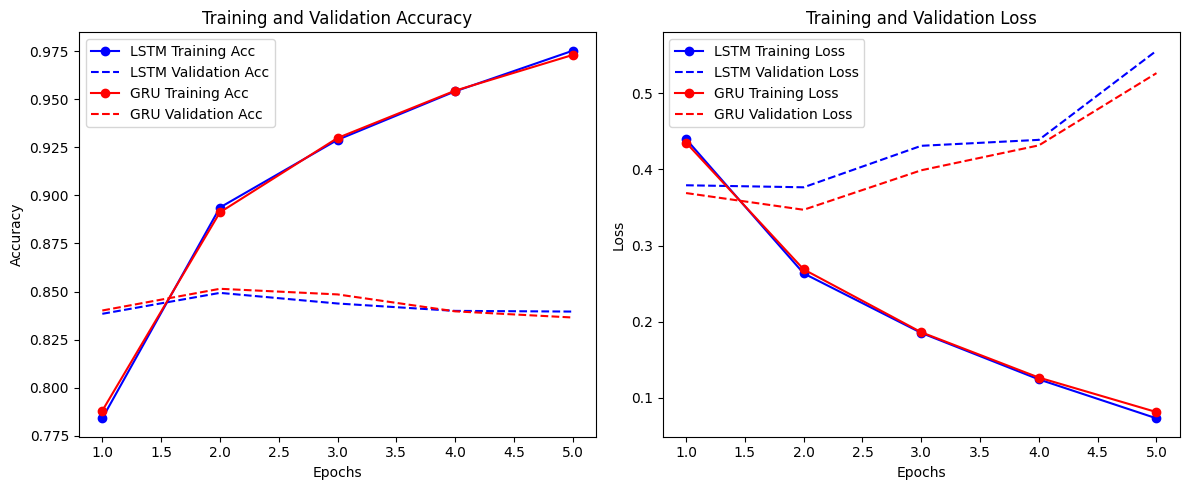

In [ ]:

import matplotlib.pyplot as plt


def plot_training_history(history_lstm, history_gru):
    epochs = range(1, len(history_lstm.history['accuracy']) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history_lstm.history['accuracy'], 'bo-', label='LSTM Training Acc')
    plt.plot(epochs, history_lstm.history['val_accuracy'], 'b--', label='LSTM Validation Acc')
    plt.plot(epochs, history_gru.history['accuracy'], 'ro-', label='GRU Training Acc')
    plt.plot(epochs, history_gru.history['val_accuracy'], 'r--', label='GRU Validation Acc')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history_lstm.history['loss'], 'bo-', label='LSTM Training Loss')
    plt.plot(epochs, history_lstm.history['val_loss'], 'b--', label='LSTM Validation Loss')
    plt.plot(epochs, history_gru.history['loss'], 'ro-', label='GRU Training Loss')
    plt.plot(epochs, history_gru.history['val_loss'], 'r--', label='GRU Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history_lstm, history_gru)


### Use of Bahdanau Attention in RNN

This code snippet sets up a neural network model for sentiment analysis using the IMDb movie reviews dataset, incorporating Bahdanau attention to enhance the model's ability to focus on relevant parts of the input sequences.

- **Bahdanau Attention Mechanism**: This custom layer computes attention scores to create a weighted sum of the hidden states, producing a context vector that captures relevant information from the entire sequence. This method helps the model pay more attention to significant words for making predictions.

- **Model Architecture**:
  - **Input and Embedding Layer**: The model starts with an input layer followed by an embedding layer that converts the input sequences into dense vectors.
  - **Simple RNN Layer**: A Simple RNN processes the embedded sequences, providing a set of outputs and a final state.
  - **Attention Layer**: The Bahdanau Attention layer takes the RNN's outputs and final state to compute the context vector, emphasizing parts of the input sequence.
  - **Output Layer**: A dense layer with sigmoid activation makes the final prediction, outputting the probability that the review is positive.

- **Training the Model**:
  - The model is compiled with the Adam optimizer and binary cross-entropy loss, which is suitable for binary classification tasks.
  - Training is conducted over several epochs, with performance evaluated against both training and validation data to monitor and mitigate overfitting.

### Significance of Bahdanau Attention

The inclusion of Bahdanau attention allows the model to dynamically focus on different parts of a text sequence as it processes input, making it particularly effective for tasks like sentiment analysis where the relevance of specific words can greatly influence the overall sentiment interpretation. This attention mechanism helps the model to better understand the context and nuances of language, leading to more accurate predictions.

### Model Output

After compiling and training, the model outputs a summary of its structure and the performance metrics during training, helping to assess how well the model is learning and predicting sentiments based on the training process.


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Input, Embedding, SimpleRNN, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Bahdanau Attention Layer customized for RNN
class BahdanauAttention(Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = Dense(units)
        self.W2 = Dense(units)
        self.V = Dense(1)

    def call(self, query, values):
        # query hidden state shape == (batch_size, hidden size)
        # values shape == (batch_size, max_len, hidden size)
        # we are doing this to calculate the score
        query_with_time_axis = tf.expand_dims(query, 1)

        # Calculate the attention scores
        score = self.V(tf.nn.tanh(
            self.W1(query_with_time_axis) + self.W2(values)))

        # attention_weights shape == (batch_size, max_len, 1)
        attention_weights = tf.nn.softmax(score, axis=1)

        # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights

# Load and prepare the dataset
max_features = 10000
maxlen = 500

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

# Model building
input_layer = Input(shape=(maxlen,))
embedding_layer = Embedding(max_features, 128)(input_layer)
rnn_output, state = SimpleRNN(64, return_sequences=True, return_state=True)(embedding_layer)

attention_layer = BahdanauAttention(64)
context_vector, attention_weights = attention_layer(state, rnn_output)

output_layer = Dense(1, activation='sigmoid')(context_vector)
model = Model(inputs=input_layer, outputs=output_layer)

# Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(input_train, y_train, epochs=5, batch_size=64, validation_data=(input_test, y_test))


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 500)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_4 (Embedding)   │ (None, 500, 128)       │      1,280,000 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ simple_rnn (SimpleRNN)    │ [(None, 500, 64),      │         12,352 │ embedding_4[0][0]      │
│                           │ (None, 64)]            │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bahdanau_attention        │ [(None, 64), (None,    │          8,385 │ simple_rnn[0][1],      │
│ (BahdanauAttention)       │ 500, 1)]               │                │ simple_rnn[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 1)              │             65 │ bahdanau_attention[0]… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,300,802 (4.96 MB)

 Trainable params: 1,300,802 (4.96 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 166s 415ms/step - accuracy: 0.7196 - loss: 0.5157 - val_accuracy: 0.8791 - val_loss: 0.2856
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 207s 429ms/step - accuracy: 0.9162 - loss: 0.2158 - val_accuracy: 0.8851 - val_loss: 0.2830
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 212s 456ms/step - accuracy: 0.9579 - loss: 0.1188 - val_accuracy: 0.8782 - val_loss: 0.3448
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 177s 452ms/step - accuracy: 0.9863 - loss: 0.0476 - val_accuracy: 0.8693 - val_loss: 0.4612
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 192s 426ms/step - accuracy: 0.9934 - loss: 0.0231 - val_accuracy: 0.8687 - val_loss: 0.4797


### Luong Attention

This code implements a neural network using TensorFlow and Keras to perform sentiment analysis on the IMDb movie reviews dataset. It incorporates Luong Attention to enhance the model's ability to focus on relevant parts of the input sequences.

- **Luong Attention Mechanism**: This variant of attention uses a simpler "dot" product approach to calculate attention scores between the input and hidden states, allowing the model to dynamically focus on important parts of the text as needed.

- **Model Architecture**:
  - **Input Layer**: Receives sequences of integer-encoded words, each corresponding to a movie review.
  - **Embedding Layer**: Maps each integer to a dense vector of a specified dimension, facilitating the model's processing of text data.
  - **Simple RNN Layer**: A Simple RNN processes the sequence, returning both the sequence of hidden states and the final hidden state.
  - **Attention Layer**: The Luong Attention layer calculates a context vector by applying the attention mechanism between the final hidden state and the sequence of hidden states.
  - **Output Layer**: A dense layer with sigmoid activation predicts the sentiment, outputting a probability indicating the likelihood of the review being positive.

- **Compilation and Training**:
  - The model is compiled using the Adam optimizer and binary cross-entropy loss, suitable for binary classification tasks.
  - It is trained over several epochs, with validation performance monitored to ensure that the model generalizes well to unseen data.

### Benefits of Luong Attention

Luong Attention is particularly beneficial for sequence modeling tasks like sentiment analysis where the relationship between different parts of the sequence can significantly influence the interpretation. This attention mechanism enables the model to 'attend' to different parts of the input sequence dynamically, enhancing its ability to capture relevant features for more accurate predictions.

### Model Summary and Training Output

After defining the model, a summary is displayed to confirm its structure. The model is then trained, providing regular updates on training and validation accuracy and loss, helping to track how well the model learns and generalizes throughout the training process.


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, Dense
from tensorflow.keras import layers
import tensorflow as tf

max_features = 10000  # Number of words in the vocabulary
maxlen = 100  # Maximum sequence length adjusted to 100
embedding_dim = 128  # Dimensionality of the embedding space

# LuongAttention as a layer
class LuongAttention(layers.Layer):
    def __init__(self, units):
        super(LuongAttention, self).__init__()
        self.W = Dense(units)  # Dense layer to project inputs

    def call(self, query, values):
        # query hidden state shape == (batch_size, hidden size)
        # values shape == (batch_size, seq_len, hidden size)
        # we are doing "dot" attention here
        query_with_time_axis = tf.expand_dims(query, 1)
        score = tf.matmul(query_with_time_axis, values, transpose_b=True)
        attention_weights = tf.nn.softmax(score, axis=-1)
        context_vector = attention_weights @ values
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=max_features)
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

# Define the model with Luong Attention
input_layer = Input(shape=(maxlen,))
embedding_layer = Embedding(max_features, embedding_dim, input_length=maxlen)(input_layer)
rnn_output, state = SimpleRNN(64, return_sequences=True, return_state=True)(embedding_layer)
attention_layer = LuongAttention(64)
context_vector, attention_weights = attention_layer(state, rnn_output)
output_layer = Dense(1, activation='sigmoid')(context_vector)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'luong_attention_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_7 (Embedding)   │ (None, 100, 128)       │      1,280,000 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ simple_rnn_3 (SimpleRNN)  │ [(None, 100, 64),      │         12,352 │ embedding_7[0][0]      │
│                           │ (None, 64)]            │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ luong_attention_2         │ [(None, 64), (None, 1, │              0 │ simple_rnn_3[0][1],    │
│ (LuongAttention)          │ 100)]                  │                │ simple_rnn_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 1)              │             65 │ luong_attention_2[0][… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,292,417 (4.93 MB)

 Trainable params: 1,292,417 (4.93 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 44s 106ms/step - accuracy: 0.7306 - loss: 0.5371 - val_accuracy: 0.8428 - val_loss: 0.3584
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 88ms/step - accuracy: 0.8859 - loss: 0.2898 - val_accuracy: 0.8410 - val_loss: 0.3697
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 44s 95ms/step - accuracy: 0.9273 - loss: 0.1976 - val_accuracy: 0.8241 - val_loss: 0.4402
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 46s 118ms/step - accuracy: 0.9664 - loss: 0.0995 - val_accuracy: 0.8260 - val_loss: 0.5268
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 71s 89ms/step - accuracy: 0.9874 - loss: 0.0450 - val_accuracy: 0.8228 - val_loss: 0.6059
